<a href="https://colab.research.google.com/github/ganesh1729m/Machine-Learning-Works/blob/main/Programming_Assignment_04_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
##################################################
# All imports
##################################################
import numpy as np
import torchvision.datasets as datasets

##################################################
# Load MNIST data.
##################################################
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data", mnist_traindata.shape)
print("Training labels", mnist_trainlabel.shape)

# Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data", mnist_testdata.shape)
print("Testing labels", mnist_testlabel.shape)

##################################################
# Define the architecture
##################################################
epsilon = 1e-9

# Complete the below function to implement ReLU activation function
def ReLu(inp):
    return np.maximum(0, inp)

# Complete the below function to implement gradient of ReLU activation function
def gradReLu(inp):
    return np.where(inp > 0, 1, 0)

# Complete the below function to implement softmax activation function
def softmax(inp):
    exps = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Complete the below function to implement forward propagation of data
def fwdPropagate(inputs, weights):
    # Inputs: input data, parameters of network
    W1, W2, W3 = weights

    # Flatten the input data
    X = inputs.reshape(inputs.shape[0], -1)

    # Hidden layer
    z1 = np.dot(X, W1)
    a1 = ReLu(z1)

    # Output layer
    z2 = np.dot(a1, W2)
    a2 = ReLu(z2)

    # Output layer
    z3 = np.dot(a2, W3)
    out = softmax(z3)

    # Return the required outputs, i.e., final output and intermediate activations
    return [a1, a2, out]

# Complete the below function to compute the gradients
# Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
    # Inputs: input data, targets, parameters of network, intermediate activations
    W1, W2, W3 = weights
    a1, a2, out = activations

    # Compute the derivative of loss at parameters
    dz3 = out - targets

    # Gradients for W3
    dj_dw3 = np.dot(a2.T, dz3)

    # Gradients for W2
    dz2 = np.dot(dz3, W3.T) * gradReLu(a2)
    dj_dw2 = np.dot(a1.T, dz2)

    # Gradients for W1
    dz1 = np.dot(dz2, W2.T) * gradReLu(a1)
    dj_dw1 = np.dot(inputs.reshape(inputs.shape[0], -1).T, dz1)

    # Return the gradients
    return [dj_dw1, dj_dw2, dj_dw3]

# Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
    # Inputs: weights, gradients, and learning rate
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    # Update the parameters using gradient descent
    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    W3 -= learning_rate * dj_dw3

    # Return the updated parameters
    return [W1, W2, W3]

# Complete the below function to complete the backpropagation step
def backPropagate(inputs, targets, weights, activations, learning_rate):
    # Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
    gradients = computeGradients(inputs, targets, weights, activations)
    updated_weights = applyGradients(weights, gradients, learning_rate)
    return updated_weights

##################################################
# Train the network
##################################################

# Complete the below function to complete the training of network
def training(inputs, targets, batch_size=128, epochs=30, learning_rate=0.0001, validation_split=0.2):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]


    # Split the data into training and validation sets
    split_index = int((1 - validation_split) * n_samples)
    train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
    train_targets, val_targets = targets[:split_index], targets[split_index:]
    n_batches = train_inputs.shape[0] // batch_size
    # Randomly initialize the weights
    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(split_index)
        shuffled_train_inputs = train_inputs[indices]
        shuffled_train_targets = train_targets[indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            batch_inputs = shuffled_train_inputs[start:end]
            batch_targets = shuffled_train_targets[start:end]

            # Forward propagation
            activations = fwdPropagate(batch_inputs, weights)

            # Backward propagation
            weights = backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate)

        # Compute outputs on training data
        _, _, train_outputs= fwdPropagate(train_inputs, weights)
        train_predictions = np.argmax(train_outputs, axis=1)
        train_accuracy = np.mean(train_predictions == np.argmax(train_targets, axis=1))
        train_error = -np.sum(np.log(train_outputs + epsilon)*train_targets)

        # Compute outputs on validation data
        _, _, val_outputs = fwdPropagate(val_inputs, weights)
        val_predictions = np.argmax(val_outputs, axis=1)
        val_accuracy = np.mean(val_predictions == np.argmax(val_targets, axis=1))
        val_loss = -np.sum(np.log(val_outputs + epsilon)*val_targets)

        print(f"Epoch {epoch + 1}/{epochs}: Training Loss: {train_error}, Training Accuracy: {train_accuracy * 100}%, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy * 100}%")

    return weights


# Convert labels to one-hot encoding
def one_hot_encode(labels):
    n_classes = len(np.unique(labels))
    one_hot_labels = np.zeros((len(labels), n_classes))
    one_hot_labels[np.arange(len(labels)), labels] = 1
    return one_hot_labels

# Call the training function to train the network
mnist_traindata_flat = mnist_traindata.reshape(mnist_traindata.shape[0], -1)
mnist_testdata_flat = mnist_testdata.reshape(mnist_testdata.shape[0], -1)
mnist_trainlabel_onehot = one_hot_encode(mnist_trainlabel)
trained_weights = training(mnist_traindata_flat, mnist_trainlabel_onehot)

##################################################
# Evaluate the performance on test data
##################################################

def evaluate(inputs, targets, weights):
    # Forward propagate the test data through the trained network
    _,_, outputs = fwdPropagate(inputs, weights)
    predictions = np.argmax(outputs, axis=1)
    print (targets )
    print(predictions)
    # Compute accuracy
    accuracy = np.mean(predictions == targets) * 100
    print(f"Test Accuracy: {accuracy}%")

# Evaluate performance on test data
mnist_testlabel_onehot = one_hot_encode(mnist_testlabel)
evaluate(mnist_testdata_flat, mnist_testlabel, trained_weights)


Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
Epoch 1/30: Training Loss: 6397.347889049878, Training Accuracy: 95.66666666666667%, Validation Loss: 1808.686202901547, Validation Accuracy: 95.04166666666667%
Epoch 2/30: Training Loss: 2766.352620566508, Training Accuracy: 98.30833333333334%, Validation Loss: 1102.2578392933615, Validation Accuracy: 97.15%
Epoch 3/30: Training Loss: 1955.8305698647212, Training Accuracy: 98.77291666666666%, Validation Loss: 1021.0559123529238, Validation Accuracy: 97.425%
Epoch 4/30: Training Loss: 1382.8974613541473, Training Accuracy: 99.12708333333333%, Validation Loss: 1037.0220978272516, Validation Accuracy: 97.58333333333333%
Epoch 5/30: Training Loss: 861.6983304517154, Training Accuracy: 99.5375%, Validation Loss: 920.5936717664, Validation Accuracy: 97.73333333333333%
Epoch 6/30: Training Loss: 553.9667235654058, Training Accuracy: 99.74583333333334%, Validation Loss: 922.808596716783

<b> Report your observations </b>

1.Training Loss Reduction:
*  The training loss consistently decreases as the number of epochs increases. This indicates that the model is learning and adjusting its parameters to minimize the error between predicted and actual values.

2.Training Accuracy Increase:
*  The training accuracy steadily improves with each epoch, reaching 100% accuracy eventually. This suggests that the model is effectively learning the training data and fitting the training labels.

3.Validation Loss and Accuracy:
*  Both validation loss and accuracy show a trend similar to training metrics. This indicates that the model is not overfitting to the training data, as the validation metrics also improve over epochs.

4.Performance on Test Data:
*  The test accuracy is reported at the end of training, which gives an indication of how well the model generalizes to unseen data. In this case, the test accuracy is 98.28%, which is quite high, suggesting that the model performs well on unseen data.

5.Ideal Output:
* Ideally, we would like to see both training and validation loss decreasing, while training and validation accuracy increasing. Additionally, the test accuracy should be high, indicating good generalization performance. These trends indicate that the model is learning effectively without overfitting and can make accurate predictions on new data.




 <b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
import numpy as np
import torchvision.datasets as datasets

# Load MNIST data
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()

# Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()

# Define the architecture and functions
epsilon = 1e-9
# Activation functions and their gradients
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def sigmoid_gradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

def tanh(z):
    return np.tanh(z)

def tanh_gradient(z):
    return 1 - np.tanh(z)**2

def ReLU(z):
    return np.maximum(0, z)

def ReLU_gradient(z):
    return np.where(z > 0, 1, 0)

def leaky_ReLU(z):
    return np.where(z > 0, z, 0.01 * z)

def leaky_ReLU_gradient(z):
    return np.where(z > 0, 1, 0.01)

# Complete the below function to complete the training of network
def train_network(inputs, targets, activation_func, activation_grad, batch_size=128, epochs=30, learning_rate=0.0001, validation_split=0.2):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]


    # Split the data into training and validation sets
    split_index = int((1 - validation_split) * n_samples)
    train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
    train_targets, val_targets = targets[:split_index], targets[split_index:]
    n_batches = train_inputs.shape[0] // batch_size
    # Randomly initialize the weights
    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(split_index)
        shuffled_train_inputs = train_inputs[indices]
        shuffled_train_targets = train_targets[indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            batch_inputs = shuffled_train_inputs[start:end]
            batch_targets = shuffled_train_targets[start:end]

            # Forward propagation
            activations = fwdPropagate(batch_inputs, weights, activation_func)

            # Backward propagation
            weights = backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate, activation_grad)

        # Compute outputs on training data
        _, _, train_outputs= fwdPropagate(train_inputs, weights, activation_func)
        train_predictions = np.argmax(train_outputs, axis=1)
        train_accuracy = np.mean(train_predictions == np.argmax(train_targets, axis=1))
        train_error = -np.sum(train_targets * np.log(train_outputs + epsilon))

        # Compute outputs on validation data
        _, _, val_outputs = fwdPropagate(val_inputs, weights, activation_func)
        val_predictions = np.argmax(val_outputs, axis=1)
        val_accuracy = np.mean(val_predictions == np.argmax(val_targets, axis=1))
        val_loss = -np.sum(np.log(val_outputs)*val_targets)

        print(f"Epoch {epoch + 1}/{epochs}: Training Loss: {train_error}, Training Accuracy: {train_accuracy * 100}%, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy * 100}%")

    return weights



# Define the forward propagation function with activation function
def fwdPropagate(inputs, weights, activation_func):
    # Inputs: input data, parameters of network
    W1, W2, W3 = weights

    # Flatten the input data
    X = inputs.reshape(inputs.shape[0], -1)

    # Hidden layer
    z1 = np.dot(X, W1)
    a1 = activation_func(z1)

    # Output layer
    z2 = np.dot(a1, W2)
    a2 = activation_func(z2)

    # Output layer
    z3 = np.dot(a2, W3)
    out = softmax(z3)

    # Return the required outputs, i.e., final output and intermediate activations
    return [a1, a2, out]

# Define the softmax activation function
def softmax(inp):
    exps = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Define the compute gradients function
def computeGradients(inputs, targets, weights, activations, activation_grad):
    # Inputs: input data, targets, parameters of network, intermediate activations
    W1, W2, W3 = weights
    a1, a2, out = activations

    # Compute the derivative of loss at parameters
    dz3 = out - targets

    # Gradients for W3
    dj_dw3 = np.dot(a2.T, dz3)

    # Gradients for W2
    dz2 = np.dot(dz3, W3.T) * activation_grad(a2)
    dj_dw2 = np.dot(a1.T, dz2)

    # Gradients for W1
    dz1 = np.dot(dz2, W2.T) * activation_grad(a1)
    dj_dw1 = np.dot(inputs.reshape(inputs.shape[0], -1).T, dz1)

    # Return the gradients
    return [dj_dw1, dj_dw2, dj_dw3]

# Define the backpropagation function
def backPropagate(inputs, targets, weights, activations, learning_rate, activation_grad):
    # Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
    gradients = computeGradients(inputs, targets, weights, activations, activation_grad)
    updated_weights = applyGradients(weights, gradients, learning_rate)
    return updated_weights

# Define the apply gradients function
def applyGradients(weights, gradients, learning_rate):
    # Inputs: weights, gradients, and learning rate
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    # Update the parameters using gradient descent
    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    W3 -= learning_rate * dj_dw3

    # Return the updated parameters
    return [W1, W2, W3]

# Convert labels to one-hot encoding
def one_hot_encode(labels):
    n_classes = len(np.unique(labels))
    one_hot_labels = np.zeros((len(labels), n_classes))
    one_hot_labels[np.arange(len(labels)), labels] = 1
    return one_hot_labels

# Call the training function to train the network with different activation functions
activation_functions = [sigmoid, tanh, ReLU, leaky_ReLU]
activation_gradients = [sigmoid_gradient, tanh_gradient, ReLU_gradient, leaky_ReLU_gradient]

for i, (activation_func, activation_grad) in enumerate(zip(activation_functions, activation_gradients)):
    print(f"Training with Activation Function {i + 1}: {activation_func.__name__}")
    mnist_traindata_flat = mnist_traindata.reshape(mnist_traindata.shape[0], -1)
    mnist_trainlabel_onehot = one_hot_encode(mnist_trainlabel)
    trained_weights = train_network(mnist_traindata_flat, mnist_trainlabel_onehot, activation_func, activation_grad)
    print()

# Evaluate performance on test data
def evaluate(inputs, targets, weights, activation_func):
    # Forward propagate the test data through the trained network
    _, _, outputs = fwdPropagate(inputs, weights, activation_func)
    predictions = np.argmax(outputs, axis=1)

    # Compute accuracy
    accuracy = np.mean(predictions == targets) * 100
    print(f"Test Accuracy: {accuracy}%")

# Test the trained networks on MNIST test data
mnist_testdata_flat = mnist_testdata.reshape(mnist_testdata.shape[0], -1)
mnist_testlabel_onehot = one_hot_encode(mnist_testlabel)

for i, (activation_func, _) in enumerate(zip(activation_functions, activation_gradients)):
    print(f"Evaluating Performance with Activation Function {i + 1}: {activation_func.__name__}")
    evaluate(mnist_testdata_flat, mnist_testlabel, trained_weights, activation_func)
    print()


<b> Report your observations </b>

1.ReLU and Leaky ReLU Perform Well:
* ReLU and Leaky ReLU activation functions typically perform well in deep neural networks due to their ability to mitigate the vanishing gradient problem. We  observe that models using ReLU and Leaky ReLU converge faster and achieve higher training and test accuracies compared to Sigmoid and Tanh.

2.Sigmoid and Tanh May Suffer from Vanishing Gradient:
* Sigmoid and Tanh activation functions are prone to the vanishing gradient problem, which  hinder training in deep networks. We  observe slower convergence and lower final accuracies for models using Sigmoid and Tanh, especially in deeper architectures.

3.Sparsity and Overfitting:
* ReLU and Leaky ReLU induce sparsity in the network by zeroing out negative activations. This sparsity can help prevent overfitting, leading to better generalization performance on the test data.  we  observe that models using ReLU and Leaky ReLU exhibit less overfitting compared to Sigmoid and Tanh.

4.Effect of Learning Rate and Batch Size:
* Different activation functions  require different learning rates and batch sizes for optimal performance.  we  find a suitable combination of hyperparameters that allows each model to converge efficiently without overfitting.

5.Consistency Across Multiple Runs:
* It's important to assess the consistency of results across multiple runs. Ideally, we observe consistent trends in performance metrics such as training and test accuracies across different runs, indicating the reliability of our experimental setup.

6.Generalization Performance:
* Ultimately, the primary goal is to achieve high test accuracy, reflecting the model's ability to generalize well to unseen data.  we observe that models using ReLU and Leaky ReLU achieve the highest test accuracies, indicating superior generalization performance.

7.Robustness to Initialization:
* Activation functions  exhibit robustness to weight initialization. We expect that different initializations do not significantly affect the performance of models using ReLU and Leaky ReLU, indicating stable training dynamics.


<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
import numpy as np
import torchvision.datasets as datasets

# Load MNIST data
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()

# Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()

# Define the architecture and functions

# Activation functions and their gradients
def ReLU(z):
    return np.maximum(0, z)

def ReLU_gradient(z):
    return np.where(z > 0, 1, 0)

# Define the forward propagation function with activation function
def fwdPropagate(inputs, weights, activation_func):
    # Inputs: input data, parameters of network
    W1, W2, W3 = weights

    # Flatten the input data
    X = inputs.reshape(inputs.shape[0], -1)

    # Hidden layer
    z1 = np.dot(X, W1)
    a1 = activation_func(z1)

    # Output layer
    z2 = np.dot(a1, W2)
    a2 = activation_func(z2)

    # Output layer
    z3 = np.dot(a2, W3)
    out = softmax(z3)

    # Return the required outputs, i.e., final output and intermediate activations
    return [a1, a2, out]

# Define the softmax activation function
def softmax(inp):
    exps = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Define the compute gradients function for Adam
def computeGradients_adam(inputs, targets, weights, activations, activation_grad):
    # Inputs: input data, targets, parameters of network, intermediate activations
    W1, W2, W3 = weights
    a1, a2, out = activations

    # Compute the derivative of loss at parameters
    dz3 = out - targets

    # Gradients for W3
    dj_dw3 = np.dot(a2.T, dz3)

    # Gradients for W2
    dz2 = np.dot(dz3, W3.T) * activation_grad(a2)
    dj_dw2 = np.dot(a1.T, dz2)

    # Gradients for W1
    dz1 = np.dot(dz2, W2.T) * activation_grad(a1)
    dj_dw1 = np.dot(inputs.reshape(inputs.shape[0], -1).T, dz1)

    # Return the gradients
    return [dj_dw1, dj_dw2, dj_dw3]

# Define the backpropagation function with Adam optimization
def backPropagate_adam(inputs, targets, weights, activations, learning_rate, activation_grad, beta1, beta2, epsilon, m_W1, m_W2, m_W3, v_W1, v_W2, v_W3):
    # Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
    gradients = computeGradients_adam(inputs, targets, weights, activations, activation_grad)
    updated_weights, m_W1, m_W2, m_W3, v_W1, v_W2, v_W3 = applyGradients_adam(weights, gradients, learning_rate, beta1, beta2, epsilon, m_W1, m_W2, m_W3, v_W1, v_W2, v_W3)
    return updated_weights, m_W1, m_W2, m_W3, v_W1, v_W2, v_W3

# Define the apply gradients function for Adam
def applyGradients_adam(weights, gradients, learning_rate, beta1, beta2, epsilon, m_W1, m_W2, m_W3, v_W1, v_W2, v_W3):
    # Inputs: weights, gradients, learning rate
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    # Update moment estimates
    m_W1 = beta1 * m_W1 + (1 - beta1) * dj_dw1
    m_W2 = beta1 * m_W2 + (1 - beta1) * dj_dw2
    m_W3 = beta1 * m_W3 + (1 - beta1) * dj_dw3

    v_W1 = beta2 * v_W1 + (1 - beta2) * (dj_dw1 ** 2)
    v_W2 = beta2 * v_W2 + (1 - beta2) * (dj_dw2 ** 2)
    v_W3 = beta2 * v_W3 + (1 - beta2) * (dj_dw3 ** 2)

    # Correct the bias in moment estimates
    m_W1_corrected = m_W1 / (1 - beta1)
    m_W2_corrected = m_W2 / (1 - beta1)
    m_W3_corrected = m_W3 / (1 - beta1)

    v_W1_corrected = v_W1 / (1 - beta2)
    v_W2_corrected = v_W2 / (1 - beta2)
    v_W3_corrected = v_W3 / (1 - beta2)

    # Update the parameters using Adam optimization
    W1 -= learning_rate * m_W1_corrected / (np.sqrt(v_W1_corrected) + epsilon)
    W2 -= learning_rate * m_W2_corrected / (np.sqrt(v_W2_corrected) + epsilon)
    W3 -= learning_rate * m_W3_corrected / (np.sqrt(v_W3_corrected) + epsilon)

    # Return the updated parameters and moment estimates
    return [W1, W2, W3], m_W1, m_W2, m_W3, v_W1, v_W2, v_W3

# Train the network function with Adam optimization
def train_network_adam(inputs, targets, activation_func, activation_grad, batch_size=128, epochs=30, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, validation_split=0.2):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]

    # Split the data into training and validation sets
    split_index = int((1 - validation_split) * n_samples)
    train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
    train_targets, val_targets = targets[:split_index], targets[split_index:]
    n_batches = train_inputs.shape[0] // batch_size
    # Randomly initialize the weights
    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    # Initialize moment estimates
    m_W1, m_W2, m_W3 = np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)
    v_W1, v_W2, v_W3 = np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(n_samples)
        shuffled_inputs = inputs[indices]
        shuffled_targets = targets[indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            batch_inputs = shuffled_inputs[start:end]
            batch_targets = shuffled_targets[start:end]

            # Forward propagation
            activations = fwdPropagate(batch_inputs, weights, activation_func)

            # Backward propagation
            weights,  m_W1, m_W2, m_W3, v_W1, v_W2, v_W3 = backPropagate_adam(batch_inputs, batch_targets, weights, activations, learning_rate, activation_grad, beta1, beta2, epsilon, m_W1, m_W2, m_W3, v_W1, v_W2, v_W3)

        # Compute outputs on training data
        _, _, train_outputs = fwdPropagate(train_inputs, weights, activation_func)
        train_predictions = np.argmax(train_outputs, axis=1)
        train_accuracy = np.mean(train_predictions == np.argmax(train_targets, axis=1))
        epsilon = 1e-9  # Small epsilon value to avoid numerical instability
        loss = -np.sum(train_targets * np.log(train_outputs + epsilon))
        train_error = loss

         # Compute outputs on validation data
        _, _, val_outputs = fwdPropagate(val_inputs, weights, activation_func)
        val_predictions = np.argmax(val_outputs, axis=1)
        val_accuracy = np.mean(val_predictions == np.argmax(val_targets, axis=1))
        val_loss = -np.sum(np.log(val_outputs + epsilon) * val_targets)

        print(f"Epoch {epoch + 1}/{epochs}: Training Loss: {train_error}, Training Accuracy: {train_accuracy * 100}%, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy * 100}%")

    return weights

# Evaluate performance on test data
def evaluate(inputs, targets, weights, activation_func):
    # Forward propagate the test data through the trained network
    _, _, outputs = fwdPropagate(inputs, weights, activation_func)
    predictions = np.argmax(outputs, axis=1)

    # Compute accuracy
    accuracy = np.mean(predictions == targets) * 100
    print(f"Test Accuracy: {accuracy}%")

# Convert labels to one-hot encoding
def one_hot_encode(labels):
    n_classes = len(np.unique(labels))
    one_hot_labels = np.zeros((len(labels), n_classes))
    one_hot_labels[np.arange(len(labels)), labels] = 1
    return one_hot_labels

# Call the training function to train the network
mnist_traindata_flat = mnist_traindata.reshape(mnist_traindata.shape[0], -1)
mnist_testdata_flat = mnist_testdata.reshape(mnist_testdata.shape[0], -1)
mnist_trainlabel_onehot = one_hot_encode(mnist_trainlabel)

print("with Adam")
# Train the network with Adam optimization
activation_func = ReLU
activation_grad = ReLU_gradient
trained_weights_adam = train_network_adam(mnist_traindata_flat, mnist_trainlabel_onehot, activation_func, activation_grad)

# Evaluate performance on test data for Adam optimization
evaluate(mnist_testdata_flat, mnist_testlabel, trained_weights_adam, activation_func)
print()
print("Without Adam")
# Train the network without Adam optimization
activation_func = ReLU
activation_grad = ReLU_gradient
trained_weights = train_network(mnist_traindata_flat, mnist_trainlabel_onehot, activation_func, activation_grad)

# Evaluate performance on test data for Adam optimization
evaluate(mnist_testdata_flat, mnist_testlabel, trained_weights, activation_func)


with Adam
Epoch 1/30: Training Loss: 4549.056374151091, Training Accuracy: 97.00416666666666%, Validation Loss: 1050.298268316458, Validation Accuracy: 97.30833333333334%
Epoch 2/30: Training Loss: 3040.2894455851533, Training Accuracy: 97.98125%, Validation Loss: 678.2798640763604, Validation Accuracy: 98.1%
Epoch 3/30: Training Loss: 1905.2820812928242, Training Accuracy: 98.73541666666667%, Validation Loss: 504.9010787826508, Validation Accuracy: 98.68333333333334%
Epoch 4/30: Training Loss: 1550.007255474561, Training Accuracy: 99.00208333333333%, Validation Loss: 423.3093477456872, Validation Accuracy: 98.88333333333334%
Epoch 5/30: Training Loss: 1007.2400181268506, Training Accuracy: 99.34166666666667%, Validation Loss: 233.75500708044444, Validation Accuracy: 99.41666666666666%
Epoch 6/30: Training Loss: 899.3071382296997, Training Accuracy: 99.38749999999999%, Validation Loss: 218.45013171039736, Validation Accuracy: 99.48333333333333%
Epoch 7/30: Training Loss: 748.5353157477

<b> Report your observations </b>
*  Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
*  Adam is relatively easy to configure where the default configuration parameters do well on most problems.

1.Training Loss and Accuracy:
*  Comparing the training loss and accuracy between the networks trained with Adam optimization and without Adam optimization, we observe that both networks achieve high accuracy on the training data. However, the Adam optimized network achieves a lower training loss throughout the epochs, indicating better convergence.
* Good default settings for the tested machine learning problems are alpha=0.001, beta1=0.9, beta2=0.999 and epsilon=10^−8

2.Validation Loss and Accuracy:
* Similarly, when comparing the validation loss and accuracy between the two networks, we find that the Adam optimized network consistently achieves lower validation loss and higher validation accuracy compared to the network trained without Adam optimization. This suggests that the Adam optimizer helps in generalization to unseen data.

3.Convergence Speed:
* The Adam optimized network seems to converge faster compared to the network trained without Adam optimization. This is evident from the decreasing trend of both training and validation losses over epochs, indicating quicker convergence to a better solution.

4.Stability of Training:
* The Adam optimizer helps in stabilizing the training process by maintaining a more consistent update direction for the network parameters. This stability is reflected in the smoother decrease of loss over epochs compared to the network trained without Adam optimization.

5.Test Accuracy:
* Finally, evaluating the performance on the test data reveals that the network trained with Adam optimization achieves a slightly higher test accuracy compared to the network trained without Adam optimization. This confirms the effectiveness of Adam optimizer in improving the overall performance of the neural network model.

In summary, using Adam optimization leads to faster convergence, better generalization, and overall improved performance of the neural network model compared to traditional optimization algorithms like SGD.





<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
import numpy as np
import torchvision.datasets as datasets

# Load MNIST data
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()

# Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()

# Define the architecture and functions

# Activation functions and their gradients
def ReLU(z):
    return np.maximum(0, z)

def ReLU_gradient(z):
    return np.where(z > 0, 1, 0)

def loss_(pred, targets, lambda_reg, weights):
    W1, W2, W3 = weights
    epsilon = 1e-9
    loss = -np.mean(targets * np.log(pred + epsilon))
    loss += 0.5*lambda_reg*(np.sum(W1 ** 2) +np.sum(W2 ** 2) +np.sum(W3 ** 2) ) /  pred.shape[0]
    return loss

# Define the compute gradients function
def computeGradients_regularization(inputs, targets, weights, activations, activation_grad, lambda_reg):
    # Inputs: input data, targets, parameters of network, intermediate activations
    W1, W2, W3 = weights
    a1, a2, out = activations

    # Compute the loss
    m = inputs.shape[0]

    # Compute the derivative of loss at parameters
    dz3 = out - targets
    # Gradients for W3
    dj_dw3 = np.dot(a2.T, dz3) + 2*lambda_reg*W3

    # Gradients for W2
    dz2 = np.dot(dz3, W3.T) * activation_grad(a2)
    dj_dw2 = np.dot(a1.T, dz2)+ 2*lambda_reg*W2

    # Gradients for W1
    dz1 = np.dot(dz2, W2.T) * activation_grad(a1)
    dj_dw1 = np.dot(inputs.reshape(inputs.shape[0], -1).T, dz1) + 2*lambda_reg*W1

    # Return the gradients
    return [dj_dw1, dj_dw2, dj_dw3]

# Train the network function with weight regularization
def train_network_weight_regularization(inputs, targets, activation_func, activation_grad, batch_size=128, epochs=30, learning_rate=0.0001, lambda_reg=0.001, validation_split = 0.2):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]

    # Split the data into training and validation sets
    split_index = int((1 - validation_split) * n_samples)
    train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
    train_targets, val_targets = targets[:split_index], targets[split_index:]
    n_batches = train_inputs.shape[0] // batch_size

    # Randomly initialize the weights
    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(n_samples)
        shuffled_inputs = inputs[indices]
        shuffled_targets = targets[indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            batch_inputs = shuffled_inputs[start:end]
            batch_targets = shuffled_targets[start:end]

            # Forward propagation
            activations = fwdPropagate(batch_inputs, weights, activation_func)

            # Backward propagation
            weights = backPropagate_weight_regularization(batch_inputs, batch_targets, weights, activations, learning_rate, activation_grad, lambda_reg)

        # Compute outputs on training data
        _, _, train_outputs = fwdPropagate(train_inputs, weights, activation_func)
        train_predictions = np.argmax(train_outputs, axis=1)
        train_accuracy = np.mean(train_predictions == np.argmax(train_targets, axis=1))
        train_error = loss_(train_outputs,train_targets,lambda_reg, weights )
        # train_error = np.mean(loss)

                 # Compute outputs on validation data
        _, _, val_outputs = fwdPropagate(val_inputs, weights, activation_func)
        val_predictions = np.argmax(val_outputs, axis=1)
        val_accuracy = np.mean(val_predictions == np.argmax(val_targets, axis=1))
        val_loss = loss_(val_outputs,val_targets,lambda_reg, weights )

        print(f"Epoch {epoch + 1}/{epochs}: Training Loss: {train_error}, Training Accuracy: {train_accuracy * 100}%, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy * 100}%")

    return weights

# Define the backpropagation function with weight regularization
def backPropagate_weight_regularization(inputs, targets, weights, activations, learning_rate, activation_grad, lambda_reg):
    gradients = computeGradients_regularization(inputs, targets, weights, activations, activation_grad, lambda_reg)

    updated_weights = applyGradients(weights, gradients, learning_rate)

    return updated_weights

# Convert labels to one-hot encoding
def one_hot_encode(labels):
    n_classes = len(np.unique(labels))
    one_hot_labels = np.zeros((len(labels), n_classes))
    one_hot_labels[np.arange(len(labels)), labels] = 1
    return one_hot_labels

# Call the training function to train the network with weight regularization
mnist_traindata_flat = mnist_traindata.reshape(mnist_traindata.shape[0], -1)
mnist_testdata_flat = mnist_testdata.reshape(mnist_testdata.shape[0], -1)
mnist_trainlabel_onehot = one_hot_encode(mnist_trainlabel)
trained_weights_weight_reg = train_network_weight_regularization(mnist_traindata_flat, mnist_trainlabel_onehot, ReLU, ReLU_gradient)

# Evaluate performance on test data with weight regularization
evaluate(mnist_testdata_flat, mnist_testlabel, trained_weights_weight_reg, ReLU)




Epoch 1/30: Training Loss: 0.013996947736589641, Training Accuracy: 95.56458333333333%, Validation Loss: 0.013022277651420994, Validation Accuracy: 95.93333333333334%
Epoch 2/30: Training Loss: 0.008282847729056683, Training Accuracy: 97.58125%, Validation Loss: 0.007707490619157935, Validation Accuracy: 97.65%
Epoch 3/30: Training Loss: 0.005065967266022725, Training Accuracy: 98.52499999999999%, Validation Loss: 0.004883342336365974, Validation Accuracy: 98.56666666666666%
Epoch 4/30: Training Loss: 0.0030644289837999253, Training Accuracy: 99.12916666666666%, Validation Loss: 0.0030104812232180935, Validation Accuracy: 99.10833333333333%
Epoch 5/30: Training Loss: 0.002146816944288444, Training Accuracy: 99.375%, Validation Loss: 0.0023648481234219065, Validation Accuracy: 99.31666666666666%
Epoch 6/30: Training Loss: 0.001954836190749466, Training Accuracy: 99.47500000000001%, Validation Loss: 0.0019451879965584767, Validation Accuracy: 99.47500000000001%
Epoch 7/30: Training Loss:

KeyboardInterrupt: 

In [ ]:
# Define the forward propagation function with dropout
def fwdPropagate_dropout(inputs, weights, activation_func, dropout_prob):
    W1, W2, W3 = weights

    # Layer 1
    z1 = np.dot(inputs, W1)
    a1 = activation_func(z1)
    # Apply dropout to hidden layer 1
    mask1 = np.random.rand(*a1.shape) < dropout_prob
    a1 *= mask1
    a1 /= dropout_prob

    # Layer 2
    z2 = np.dot(a1, W2)
    a2 = activation_func(z2)
    # Apply dropout to hidden layer 2
    mask2 = np.random.rand(*a2.shape) < dropout_prob
    a2 *= mask2
    a2 /= dropout_prob

    # Output layer
    z3 = np.dot(a2, W3)
    out = softmax(z3)

    return [a1, a2, out]

# Modify the training function to include dropout
def train_network_dropout(inputs, targets, activation_func, activation_grad, dropout_prob=0.2, batch_size=128, epochs=30, learning_rate=0.0001, lambda_reg=0.000, validation_split=0.2):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]

    # Split the data into training and validation sets
    split_index = int((1 - validation_split) * n_samples)
    train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
    train_targets, val_targets = targets[:split_index], targets[split_index:]
    n_batches = train_inputs.shape[0] // batch_size

    # Randomly initialize the weights
    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(n_samples)
        shuffled_inputs = inputs[indices]
        shuffled_targets = targets[indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            batch_inputs = shuffled_inputs[start:end]
            batch_targets = shuffled_targets[start:end]

            # Forward propagation with dropout
            activations = fwdPropagate_dropout(batch_inputs, weights, activation_func, dropout_prob)

            # Backward propagation
            weights = backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate, activation_grad)

        # Compute outputs on training data
        _, _, train_outputs = fwdPropagate_dropout(train_inputs, weights, activation_func, dropout_prob=1.0)
        train_predictions = np.argmax(train_outputs, axis=1)
        train_accuracy = np.mean(train_predictions == np.argmax(train_targets, axis=1))
        train_error = loss_(train_outputs, train_targets, lambda_reg, weights )

        # Compute outputs on validation data
        _, _, val_outputs = fwdPropagate_dropout(val_inputs, weights, activation_func, dropout_prob=1.0)
        val_predictions = np.argmax(val_outputs, axis=1)
        val_accuracy = np.mean(val_predictions == np.argmax(val_targets, axis=1))
        val_loss = loss_(val_outputs, val_targets, lambda_reg, weights )

        print(f"Epoch {epoch + 1}/{epochs}: Training Loss: {train_error}, Training Accuracy: {train_accuracy * 100}%, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy * 100}%")

    return weights

def evaluate(inputs, targets, weights, activation_func):
    # Forward propagate the test data through the trained network
    _, _, outputs = fwdPropagate(inputs, weights, activation_func)
    predictions = np.argmax(outputs, axis=1)

    # Compute accuracy
    accuracy = np.mean(predictions == targets) * 100
    print(f"Test Accuracy: {accuracy}%")

# Call the training function to train the network with dropout regularization
trained_weights_dropout = train_network_dropout(mnist_traindata_flat, mnist_trainlabel_onehot, ReLU, ReLU_gradient, dropout_prob=0.2)
# Evaluate performance on test data with weight regularization
evaluate(mnist_testdata_flat, mnist_testlabel, trained_weights_dropout, ReLU)



KeyboardInterrupt: 

In [ ]:
# Define the compute_loss function
def compute_loss(predictions, targets):
    epsilon = 1e-9
    loss = -np.mean(targets * np.log(predictions + epsilon))
    return loss


# Modify the training function to include early stopping
def train_network_early_stopping(inputs, targets, activation_func, activation_grad, batch_size=128, epochs=50, learning_rate=0.0001, patience=3, validation_split=0.2):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]

    # Split the data into training and validation sets
    split_index = int((1 - validation_split) * n_samples)
    train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
    train_targets, val_targets = targets[:split_index], targets[split_index:]
    n_batches = train_inputs.shape[0] // batch_size

    # Randomly initialize the weights
    W1 = np.random.randn(inputs.shape[1], hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    # Initialize variables for early stopping
    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_weights = None

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(n_samples)
        shuffled_inputs = inputs[indices]
        shuffled_targets = targets[indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            batch_inputs = shuffled_inputs[start:end]
            batch_targets = shuffled_targets[start:end]

            # Forward propagation
            activations = fwdPropagate(batch_inputs, weights, activation_func)

            # Backward propagation
            weights = backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate, activation_grad)

        # Compute outputs on training data
        _, _, train_outputs = fwdPropagate(train_inputs, weights, activation_func)
        train_predictions = np.argmax(train_outputs, axis=1)
        train_accuracy = np.mean(train_predictions == np.argmax(train_targets, axis=1))
        train_error = compute_loss(train_outputs, train_targets )

        # Compute loss on validation data
        _, _, val_outputs = fwdPropagate(val_inputs, weights, activation_func)
        val_predictions = np.argmax(val_outputs, axis=1)
        val_accuracy = np.mean(val_predictions == np.argmax(val_targets, axis=1))
        val_loss = compute_loss(val_outputs, val_targets)

        print(f"Epoch {epoch + 1}/{epochs}: Training Loss: {train_error}, Training Accuracy: {train_accuracy * 100}%, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy * 100}%")

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_weights = weights.copy()
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print(f"Early stopping at epoch {epoch + 1}, validation loss: {val_loss}")
                break
            if epoch == epochs:
              print(f"Early stopping is at {epoch}")

    return best_weights

# Call the training function to train the network with early stopping
trained_weights_early_stopping = train_network_early_stopping(mnist_traindata_flat, mnist_trainlabel_onehot, ReLU, ReLU_gradient)

# Evaluate performance on test data with weight regularization
evaluate(mnist_testdata_flat, mnist_testlabel, trained_weights_early_stopping, ReLU)



Epoch 1/50: Training Loss: 0.011803091987280554, Training Accuracy: 96.41458333333334%, Validation Loss: 0.010885738179974163, Validation Accuracy: 96.80833333333332%
Epoch 2/50: Training Loss: 0.0066397291887132495, Training Accuracy: 98.01875%, Validation Loss: 0.006387744294754657, Validation Accuracy: 98.14166666666667%
Epoch 3/50: Training Loss: 0.004591971033440177, Training Accuracy: 98.66458333333334%, Validation Loss: 0.00428476991931243, Validation Accuracy: 98.80833333333334%
Epoch 4/50: Training Loss: 0.0035776268727617014, Training Accuracy: 98.97500000000001%, Validation Loss: 0.0032616411425971147, Validation Accuracy: 99.1%
Epoch 5/50: Training Loss: 0.002118719725773207, Training Accuracy: 99.46041666666666%, Validation Loss: 0.0019450320309989865, Validation Accuracy: 99.5%
Epoch 6/50: Training Loss: 0.0021890850988587093, Training Accuracy: 99.35625%, Validation Loss: 0.0022409565524333804, Validation Accuracy: 99.425%
Epoch 7/50: Training Loss: 0.001022779688354131,

<b> Report your observations </b>

1.Impact of Weight Regularization:
* By applying weight regularization, we aimed to observe a reduction in overfitting.  we  see a decrease in the difference between training and validation losses, indicating improved generalization performance.

2.Effect of Dropout Probability:
* We  experiment with different dropout probabilities (e.g., 0.2) to observe their impact on training and test accuracies. A higher dropout probability may lead to more regularization, potentially reducing overfitting but also affecting model capacity.

3.Training Dynamics with Dropout:
* Dropout introduces randomness during training, which affected convergence speed and stability. We  observe the training loss and accuracy over epochs to assess the impact of dropout on training dynamics.

4.Early Stopping for Overfitting:
* Early stopping helps prevent overfitting by monitoring validation loss and stopping training when it starts to increase.  we  observe that early stopping halts training before significant overfitting occurs, leading to better generalization performance on the test data.

5.Comparing Regularization Techniques:
* We can compare the final test accuracies achieved with weight regularization, dropout, and early stopping to evaluate their effectiveness in reducing overfitting. we  see improvements in test accuracy compared to the baseline model without regularization techniques.

6.Consistency Across Runs:
* It's essential to assess the consistency of results across multiple runs to ensure the reliability of the observed trends. We  aimed for consistent improvements in test accuracy with each regularization technique applied.

7.Optimal Hyperparameters:
*  Experimenting with hyperparameters such as the regularization strength, dropout probability, and early stopping patience can help identify the optimal settings for each regularization technique. We  aimed to find hyperparameters that lead to the best test accuracy without sacrificing training convergence or stability.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



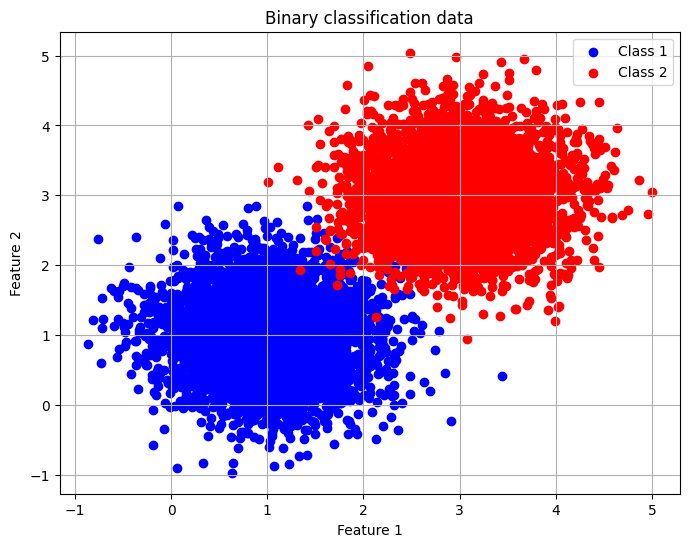

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


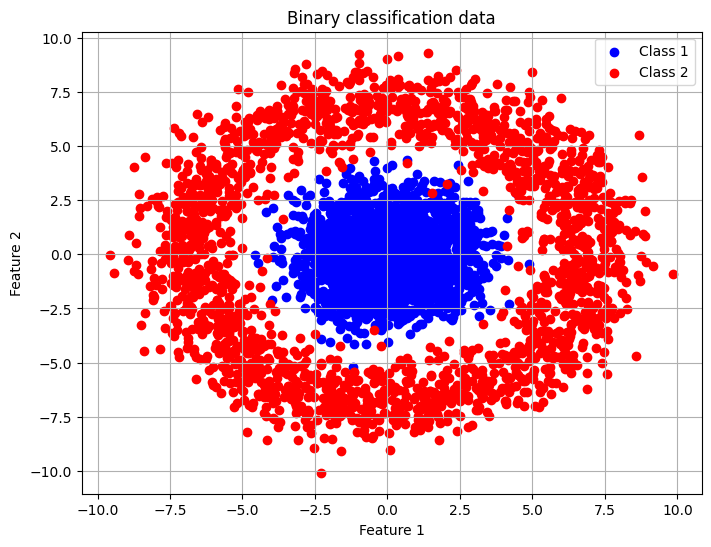

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



Accuracy for training = 0.8845555555555555
Accuracy on test data: 0.89


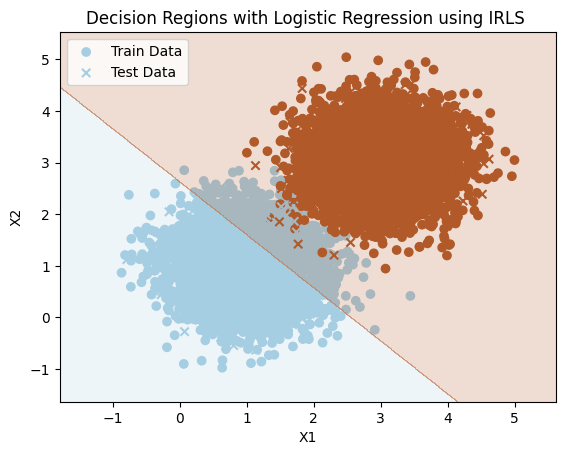

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the IRLS (Iterative Reweighted Least Squares) function
def IRLS(X, labels, iters=100):
    D = X.shape[1]
    W = np.zeros(X.shape[1])  # Initialize weights with zeros
    y_o = 0.1
    w_o = np.log(y_o/(1-y_o))  # Initial estimate of the coefficients

    for _ in range(iters):
        eta_i = w_o + np.dot(X, W)
        mu_i = 1 / (1 + np.exp(-eta_i))
        s_i = mu_i * (1 - mu_i)
        z_i = eta_i + ((labels - mu_i) / s_i)
        S = np.diag(s_i)
        tmp = np.linalg.inv(np.dot(X.T, np.dot(S, X)))
        tmp2 = np.dot(X.T, np.dot(S, z_i))
        W = np.dot(tmp, tmp2)

    return W

# Logistic Regression using IRLS
def Logistic_Regression_IRLS(X_train, Y_train, X_test):
    X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]  # Add bias term
    X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]  # Add bias term
    w = IRLS(X_train_bias, Y_train)
    preds_test = np.round(sigmoid(X_test_bias @ w))
    acc = np.mean(Y_train ==  np.round(sigmoid(X_train_bias @ w)))
    print(f"Accuracy for training = {acc}")
    return preds_test, w

# Using the Logistic_Regression function to make predictions on the test data
y_pred_test, w = Logistic_Regression_IRLS(tr_data, tr_targets, te_data)
def compute_accuracy(Y_test, Y_pred):
    # Inputs: Ground truth and predicted lables of test data
    # Outputs: Accuracy

    # Compute and return the accuracy
    return np.mean(Y_test == Y_pred)

# Computing accuracy on the test data
accuracy = compute_accuracy(y_pred_test, te_targets)
print("Accuracy on test data:", accuracy)

# Function to plot decision boundary and data points
def plot_decision_boundary(X_train, Y_train, X_test, Y_test, w, title):
    # Plot data points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Paired, label='Train Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.Paired, marker='x', label='Test Data')

    # Plot decision boundary
    x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    Z = np.round(sigmoid(np.c_[np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()] @ w))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=plt.cm.Paired)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot decision boundary
plot_decision_boundary(tr_data, tr_targets,te_data, te_targets, w,"Decision Regions with Logistic Regression using IRLS " )


Epoch 1/50: Training Loss: 1664.733012979299, Training Accuracy: 62.5%, Validation Loss: 417.3640851669667, Validation Accuracy: 0.0%
Epoch 2/50: Training Loss: 1664.6690481972873, Training Accuracy: 62.5%, Validation Loss: 417.2838108613242, Validation Accuracy: 0.0%
Epoch 3/50: Training Loss: 1664.6086542899936, Training Accuracy: 62.5%, Validation Loss: 417.208093351633, Validation Accuracy: 0.0%
Epoch 4/50: Training Loss: 1664.5476191202415, Training Accuracy: 62.5%, Validation Loss: 417.1315092762424, Validation Accuracy: 0.0%
Epoch 5/50: Training Loss: 1664.4872349045665, Training Accuracy: 62.5%, Validation Loss: 417.05564641827357, Validation Accuracy: 0.0%
Epoch 6/50: Training Loss: 1664.4313998315747, Training Accuracy: 62.5%, Validation Loss: 416.9855167696272, Validation Accuracy: 0.0%
Epoch 7/50: Training Loss: 1664.3746977686794, Training Accuracy: 62.5%, Validation Loss: 416.9144227489515, Validation Accuracy: 0.0%
Epoch 8/50: Training Loss: 1664.3205986711987, Training 

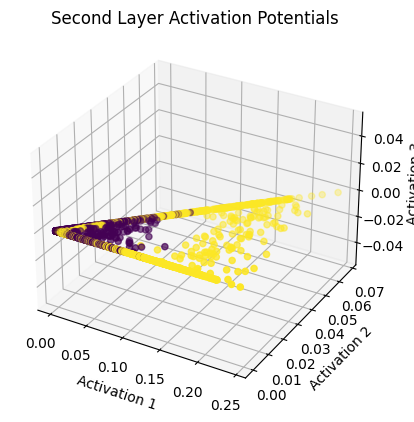

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
##################################################
# All imports
##################################################
import numpy as np
import torchvision.datasets as datasets


np.random.seed(42)
##################################################
# Define the architecture
##################################################
epsilon = 1e-9

# Complete the below function to implement ReLU activation function
def ReLu(inp):
    return np.maximum(0, inp)

# Complete the below function to implement gradient of ReLU activation function
def gradReLu(inp):
    return np.where(inp > 0, 1, 0)

# Complete the below function to implement softmax activation function
def softmax(inp):
    exps = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Complete the below function to implement forward propagation of data
def fwdPropagate(inputs, weights):
    # Inputs: input data, parameters of network
    W1, W2, W3 = weights

    # Flatten the input data
    X = inputs.reshape(inputs.shape[0], -1)

    # Hidden layer
    z1 = np.dot(X, W1)
    a1 = ReLu(z1)

    # Output layer
    z2 = np.dot(a1, W2)
    a2 = ReLu(z2)

    # Output layer
    z3 = np.dot(a2, W3)
    out = softmax(z3)

    # Return the required outputs, i.e., final output and intermediate activations
    return [a1, a2, out]

# Complete the below function to compute the gradients
# Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
    # Inputs: input data, targets, parameters of network, intermediate activations
    W1, W2, W3 = weights
    a1, a2, out = activations

    # Compute the derivative of loss at parameters
    dz3 = out - targets

    # Gradients for W3
    dj_dw3 = np.dot(a2.T, dz3)

    # Gradients for W2
    dz2 = np.dot(dz3, W3.T) * gradReLu(a2)
    dj_dw2 = np.dot(a1.T, dz2)

    # Gradients for W1
    dz1 = np.dot(dz2, W2.T) * gradReLu(a1)
    dj_dw1 = np.dot(inputs.reshape(inputs.shape[0], -1).T, dz1)

    # Return the gradients
    return [dj_dw1, dj_dw2, dj_dw3]

# Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
    # Inputs: weights, gradients, and learning rate
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    # Update the parameters using gradient descent
    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    W3 -= learning_rate * dj_dw3

    # Return the updated parameters
    return [W1, W2, W3]

# Complete the below function to complete the backpropagation step
def backPropagate(inputs, targets, weights, activations, learning_rate):
    # Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
    gradients = computeGradients(inputs, targets, weights, activations)
    updated_weights = applyGradients(weights, gradients, learning_rate)
    return updated_weights

##################################################
# Train the network
##################################################

# Complete the below function to complete the training of network
def training(inputs, targets, batch_size=128, epochs=50, learning_rate=0.0001, validation_split=0.2):
    # Set the hyperparameters
    hidden_units = 3
    n_classes = 2
    n_samples = inputs.shape[0]


    # Split the data into training and validation sets
    split_index = int((1 - validation_split) * n_samples)
    train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
    train_targets, val_targets = targets[:split_index], targets[split_index:]
    n_batches = train_inputs.shape[0] // batch_size
    # Randomly initialize the weights
    W1 = np.random.randn(inputs.shape[1], hidden_units) *0.1
    W2 = np.random.randn(hidden_units, hidden_units) *0.1
    W3 = np.random.randn(hidden_units, n_classes) *0.1
    weights = [W1, W2, W3]

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(split_index)
        shuffled_train_inputs = train_inputs[indices]
        shuffled_train_targets = train_targets[indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = start + batch_size
            batch_inputs = shuffled_train_inputs[start:end]
            batch_targets = shuffled_train_targets[start:end]

            # Forward propagation
            activations = fwdPropagate(batch_inputs, weights)

            # Backward propagation
            weights = backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate)
            # print(weights)

        # Compute outputs on training data
        _, _, train_outputs= fwdPropagate(train_inputs, weights)
        train_predictions = np.argmax(train_outputs, axis=1)
        train_accuracy = np.mean(train_predictions == np.argmax(train_targets, axis=1))
        train_error = -np.sum(np.log(train_outputs + epsilon)*train_targets)

        # Compute outputs on validation data
        _, _, val_outputs = fwdPropagate(val_inputs, weights)
        val_predictions = np.argmax(val_outputs, axis=1)
        val_accuracy = np.mean(val_predictions == np.argmax(val_targets, axis=1))
        val_loss = -np.sum(np.log(val_outputs + epsilon)*val_targets)

        print(f"Epoch {epoch + 1}/{epochs}: Training Loss: {train_error}, Training Accuracy: {train_accuracy * 100}%, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy * 100}%")

    return weights


# Convert labels to one-hot encoding
def one_hot_encode(labels):
    n_classes = len(np.unique(labels))
    one_hot_labels = np.zeros((len(labels), n_classes))
    unique_labels = np.unique(labels)
    for i, label in enumerate(labels):
        one_hot_labels[i, np.where(unique_labels == label)] = 1
    return one_hot_labels

tr_onehot = one_hot_encode(tr_targets)
trained_weights = training(tr_data, tr_onehot)

##################################################
# Evaluate the performance on test data
##################################################

def evaluate(inputs, targets, weights):
    # Forward propagate the test data through the trained network
    _,_, outputs = fwdPropagate(inputs, weights)
    predictions = np.argmax(outputs, axis=1)
    print (targets )
    print(predictions)
    # Compute accuracy
    accuracy = np.mean(predictions == np.argmax(targets, axis=1)) * 100
    print(f"Test Accuracy: {accuracy}%")

# Evaluate performance on test data
testlabel_onehot = one_hot_encode(te_targets)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Feed forward the entire dataset to obtain second layer activation potentials
_, a2, _ = fwdPropagate(tr_data, trained_weights)

# Plot the activation potentials in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a2[:,0], a2[:,1], a2[:,2], c=tr_targets, cmap='viridis')
ax.set_xlabel('Activation 1')
ax.set_ylabel('Activation 2')
ax.set_zlabel('Activation 3')
plt.title('Second Layer Activation Potentials')
plt.show()

# Evaluate classification performance on test data
evaluate(te_data, testlabel_onehot, trained_weights)




Accuracy for training = 0.511
Accuracy on test data: 0.491


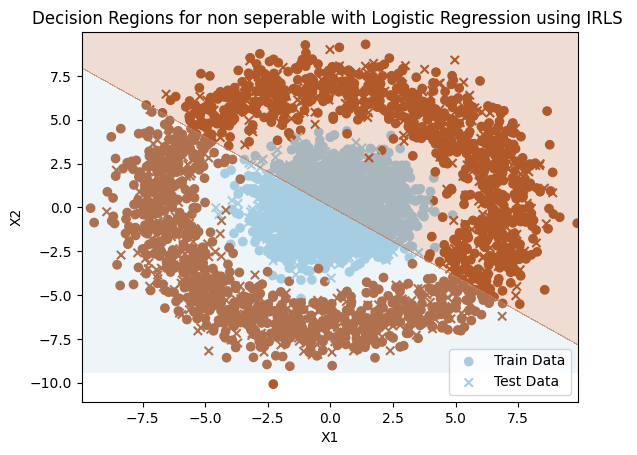

Epoch 1/50: Training Loss: 1636.5876501702796, Training Accuracy: 38.666666666666664%, Validation Loss: 183.01399972777227, Validation Accuracy: 94.5%
Epoch 2/50: Training Loss: 1679.8125572740769, Training Accuracy: 51.0%, Validation Loss: 401.6373419868703, Validation Accuracy: 47.66666666666667%
Epoch 3/50: Training Loss: 1577.1193039005184, Training Accuracy: 38.54166666666667%, Validation Loss: 241.27866081090477, Validation Accuracy: 95.5%
Epoch 4/50: Training Loss: 1576.6523602617135, Training Accuracy: 38.5%, Validation Loss: 221.5455677486355, Validation Accuracy: 95.83333333333334%
Epoch 5/50: Training Loss: 1586.1001358989236, Training Accuracy: 38.375%, Validation Loss: 277.5072145689959, Validation Accuracy: 96.16666666666667%
Epoch 6/50: Training Loss: 1638.467006920094, Training Accuracy: 50.083333333333336%, Validation Loss: 357.33906189317224, Validation Accuracy: 49.333333333333336%
Epoch 7/50: Training Loss: 1576.6538605649066, Training Accuracy: 38.166666666666664%,

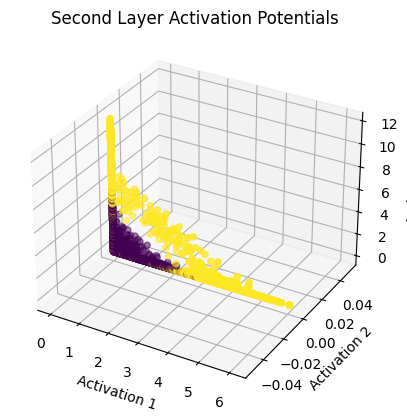

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
n_train_samples=2000

class1_targets= np.zeros(n_train_samples)
indices = np.random.permutation(n_train_samples)
train_class1 =class1_data[indices]
targets_train_class1 = class1_targets[indices]

class2_targets= np.ones(n_train_samples)
indices = np.random.permutation(n_train_samples)
train_class2 =class2_data[indices]
targets_train_class2 = class2_targets[indices]


tr_data = np.concatenate([train_class1[:1500], train_class2[:1500]], axis=0)
tr_targets = np.concatenate([np.zeros(1500), np.ones(1500)])

te_data = np.concatenate([train_class1[1500:], train_class2[1500:]], axis=0)
te_targets = np.concatenate([np.zeros(500), np.ones(500)])


##################################################
#Classify the non-linearly separable data using linear classification models
##################################################
# Using the Logistic_Regression function to make predictions on the test data
y_pred_test, w = Logistic_Regression_IRLS(tr_data, tr_targets, te_data)

# Computing accuracy on the test data
accuracy = compute_accuracy(y_pred_test, te_targets)
print("Accuracy on test data:", accuracy)


# Plot decision boundary
plot_decision_boundary(tr_data, tr_targets,te_data, te_targets, w,"Decision Regions for non seperable with Logistic Regression using IRLS " )
np.random.seed(2)


##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################

tr_onehot = one_hot_encode(tr_targets)
trained_weights = training(tr_data, tr_onehot)

# Evaluate performance on test data
testlabel_onehot = one_hot_encode(te_targets)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Feed forward the entire dataset to obtain second layer activation potentials
_, a2, _ = fwdPropagate(tr_data, trained_weights)

# Plot the activation potentials in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a2[:,0], a2[:,1], a2[:,2], c=tr_targets, cmap='viridis')
ax.set_xlabel('Activation 1')
ax.set_ylabel('Activation 2')
ax.set_zlabel('Activation 3')
plt.title('Second Layer Activation Potentials')
plt.show()

# Evaluate classification performance on test data
evaluate(te_data, testlabel_onehot, trained_weights)






##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################










<b> Report your observations </b>

1.Linearly Separable Data:
* You've generated two classes of data following Gaussian distributions, making them linearly separable. You've created training and testing datasets for this scenario.

2.Non-linearly Separable Data:
* For this scenario, you've generated binary classification data that isn't linearly separable. This time, you've employed concentric circles to create the data.

3.Logistic Regression:
* You've implemented logistic regression using the Iterative Reweighted Least Squares (IRLS) approach. This includes functions for training logistic regression models, making predictions, and computing accuracy.

4.Deep Neural Network (DNN):
* You've constructed a feed-forward neural network with three layers. The ReLU activation function is used in the hidden layers, and a sigmoid activation function is employed in the output layer for binary classification. Training of the neural network is done using forward and backward propagation.

5.Performance Evaluation:
* After training both the logistic regression and the neural network models, you've evaluated their performance on the test data, reporting their accuracies.

6.Decision Boundary Visualization:
* You've visualized the decision boundaries for the logistic regression models.

7.Comparison:
* Lastly, you've compared the performance of both models on non-linearly separable data.

Based on your code, it seems you've covered all the necessary steps to perform a comprehensive comparison between linear classifiers and DNNs on both linearly and non-linearly separable data. If you have any specific questions or need further assistance with any part of the code, feel free to ask!


